# Assgn_04  Muhammad rizwan

## Techniques to prevent face identification

## 1. Assgn_04_1 Blurring on the ROI with kernel size

Using Custom Kernel

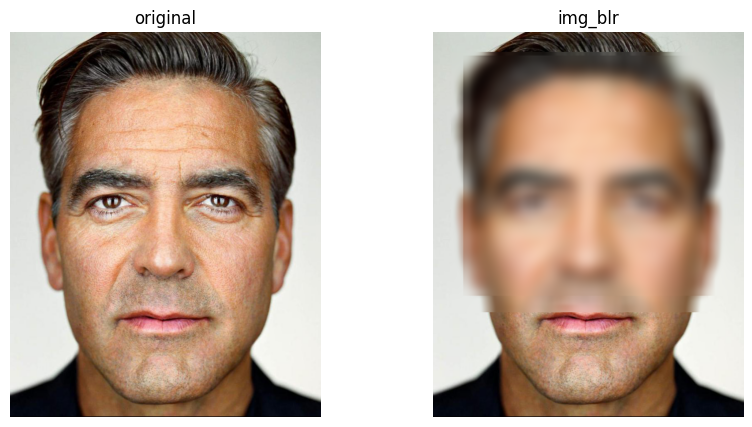

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Initialize variables
#kernel = np.ones((3, 3), np.float32) / 9              # The kernel size to use for blur handling.
#kernel = np.ones((7, 7), np.float32) / 49
kernel = np.ones((35, 35), np.float32) / 1225
win_title = 'blur'      # window title

img = cv2.imread('./images/practice_img/actor.jpg')    # read img
img_org = img.copy()    # make a copy for later use

# Variables to track mouse events
roi_dragging = False
x, y, w, h = -1, -1, -1, -1
roi = None

# Mouse callback function
def select_roi(event, ex, ey, flags, param):
    global x, y, w, h, roi_dragging, roi

    if event == cv2.EVENT_LBUTTONDOWN:
        x, y = ex, ey
        w, h = 0, 0
        roi_dragging = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if roi_dragging:
            w, h = ex - x, ey - y
    elif event == cv2.EVENT_LBUTTONUP:
        if roi_dragging:
            roi = img[y:y+h, x:x+w]
            img_blur = cv2.filter2D(roi, -1, kernel)  #using custom blur kernel
            img[y:y+h, x:x+w] = img_blur
            roi_dragging = False

# Create a window and set the mouse callback
cv2.namedWindow(win_title)
cv2.setMouseCallback(win_title, select_roi)

while True:
    cv2.imshow(win_title, img)
    key = cv2.waitKey(1) & 0xFF
    if key == 27:  # esc key
        break

cv2.destroyAllWindows()

# Create a subplot to display the original and blurred images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('img_blr')

plt.show()


Using GaussianBlur based on the selected ksize

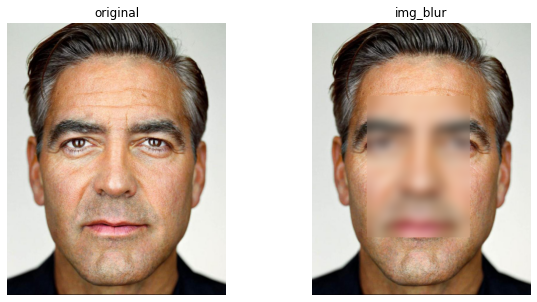

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Initialize variables
ksize = 51              # The kernel size to use for blur handling.
win_title = 'blur'      # window title

img = cv2.imread('./images/practice_img/actor.jpg')    # read img
img_org = img.copy()    # make a copy for later use

# Variables to track mouse events
roi_dragging = False
x, y, w, h = -1, -1, -1, -1
roi = None

# Trackbar callback function
def on_trackbar(val):
    global ksize
    # Ensure ksize is odd
    ksize = max(val, 1) if val % 2 == 1 else max(val + 1, 1)
    apply_blur()

# Mouse callback function
def select_roi(event, ex, ey, flags, param):
    global x, y, w, h, roi_dragging, roi

    if event == cv2.EVENT_LBUTTONDOWN:
        x, y = ex, ey
        w, h = 0, 0
        roi_dragging = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if roi_dragging:
            w, h = ex - x, ey - y
    elif event == cv2.EVENT_LBUTTONUP:
        if roi_dragging:
            roi = img[y:y+h, x:x+w]
            apply_blur()
            roi_dragging = False

# Apply Gaussian blur to the selected ROI
def apply_blur():
    global img, roi, ksize
    if roi is not None:
        img_blur = cv2.GaussianBlur(roi, (ksize, ksize), 0)  #using GaussianBlur kernel of selected ksize
        img[y:y+h, x:x+w] = img_blur

# Create a window and set the mouse callback
cv2.namedWindow(win_title)
cv2.setMouseCallback(win_title, select_roi)

# Create a trackbar to adjust ksize
cv2.createTrackbar('Blur Size', win_title, ksize, 101, on_trackbar)

while True:
    cv2.imshow(win_title, img)
    key = cv2.waitKey(1) & 0xFF
    if key == 13:  # Enter key
        break

cv2.destroyAllWindows()

# Create a subplot to display the original and blurred images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('img_blur')

plt.show()


## 2. Assgn_04_2 Mosaicing the ROI 

Using OpenCVs built-in ROI

In [6]:
import cv2
from matplotlib import pyplot as plt


#rate = 5             # Shrink ratio to use for mosaic (1/rate)
#rate = 15
rate = 35               
win_title = 'mosaic'    # window title

img = cv2.imread('./images/practice_img/actor.jpg')    # read img

while True:
    x, y, w, h = cv2.selectROI(win_title, img)  # Select ROI using OpenCV's built-in ROI selection
    if w and h:
        roi = img[y:y+h, x:x+w]  # designate ROI
        roi_small = cv2.resize(roi, (w // rate, h // rate))  # Shrink the ROI
        roi_back = cv2.resize(roi_small, (w, h), interpolation=cv2.INTER_LINEAR)  # Enlarge with interpolation
        img[y:y+h, x:x+w] = roi_back  # Apply to the original image
        
        #img5=img.copy()
        #img15=img.copy()
        img35=img.copy()
        cv2.imshow(win_title, img)
        
    else:
        break
cv2.destroyAllWindows()



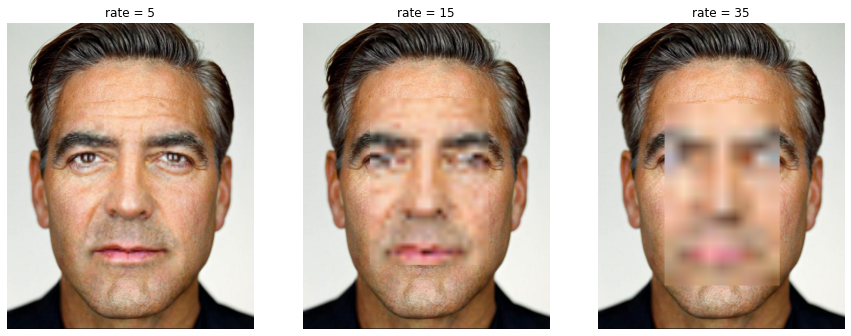

In [7]:
fig, axs = plt.subplots(1,3, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('rate = 5')
axs[1].imshow(cv2.cvtColor(img15, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('rate = 15')
axs[2].imshow(cv2.cvtColor(img35, cv2.COLOR_BGR2RGB)), axs[2].axis('off'), axs[2].set_title('rate = 35')

plt.show()

Using ROI selecting based on the selected rate and mouse events

In [10]:
import cv2
from matplotlib import pyplot as plt

# Custom ROI selection with a shrink ratio
#rate = 5             # Shrink ratio to use for mosaic (1/rate)
#rate = 15
rate = 35 

def select_roi(event, ex, ey, flags, param):
    global x, y, w, h, roi_dragging, roi

    if event == cv2.EVENT_LBUTTONDOWN:
        x, y = ex, ey
        w, h = 0, 0
        roi_dragging = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if roi_dragging:
            w, h = ex - x, ey - y
    elif event == cv2.EVENT_LBUTTONUP:
        if roi_dragging:
            roi = img[y:y+h, x:x+w]
            # Shrink the ROI based on the selected ratio
            roi_small = cv2.resize(roi, (w // rate, h // rate))
            roi_back = cv2.resize(roi_small, (w, h), interpolation=cv2.INTER_LINEAR)
            img[y:y+h, x:x+w] = roi_back
            roi_dragging = False

# Initialize variables
win_title = 'mosaic'    # window title

img = cv2.imread('./images/practice_img/actor.jpg')    # read img

# Variables to track mouse events
roi_dragging = False
x, y, w, h = -1, -1, -1, -1
roi = None

# Create a window and set the mouse callback
cv2.namedWindow(win_title)
cv2.setMouseCallback(win_title, select_roi)

while True:
    cv2.imshow(win_title, img)
    key = cv2.waitKey(1) & 0xFF
    if key == 13:  # Enter key
        break

        #img5=img.copy()
        #img15=img.copy()
        img35=img.copy()
        cv2.imshow(win_title, img)
cv2.destroyAllWindows()




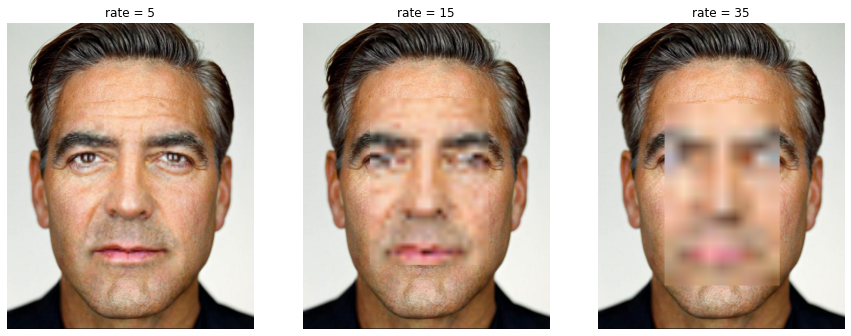

In [11]:
fig, axs = plt.subplots(1,3, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('rate = 5')
axs[1].imshow(cv2.cvtColor(img15, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('rate = 15')
axs[2].imshow(cv2.cvtColor(img35, cv2.COLOR_BGR2RGB)), axs[2].axis('off'), axs[2].set_title('rate = 35')

plt.show()

Using Zoom In and Zoom Out

In [13]:
import cv2

# Initialize variables
win_title = 'image'
img = cv2.imread('./images/practice_img/actor.jpg')  # read image
original_img = img.copy()
rate = 15  # Initial shrink ratio

def select_roi(event, ex, ey, flags, param):
    global x, y, w, h, roi_dragging, roi, img

    if event == cv2.EVENT_LBUTTONDOWN:
        x, y = ex, ey
        w, h = 0, 0
        roi_dragging = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if roi_dragging:
            w, h = ex - x, ey - y
    elif event == cv2.EVENT_LBUTTONUP:
        if roi_dragging:
            roi = img[y:y + h, x:x + w]
            # Shrink or expand the ROI based on the selected ratio
            roi_small = cv2.resize(roi, (w // rate, h // rate))
            roi_back = cv2.resize(roi_small, (w, h), interpolation=cv2.INTER_LINEAR)
            img[y:y + h, x:x + w] = roi_back
            roi_dragging = False

def zoom_in():
    global rate, img
    rate = 5
    img = cv2.resize(original_img.copy(), None, fx=1/rate, fy=1/rate)

def zoom_out():
    global rate, img
    rate = 35
    img = cv2.resize(original_img.copy(), None, fx=1/rate, fy=1/rate)

# Create a window and set the mouse callback
cv2.namedWindow(win_title)
cv2.setMouseCallback(win_title, select_roi)

while True:
    cv2.imshow(win_title, img)
    key = cv2.waitKey(1) & 0xFF
     
        
    img15=img.copy()
        
    if key == ord('i'):  # Press 'i' for zoom-in
        zoom_in()
        img5=img.copy()
    elif key == ord('o'):  # Press 'o' for zoom-out
        zoom_out()
        img35=img.copy()
    elif key == 27:  # Press 'Esc' to exit
        break

cv2.destroyAllWindows()


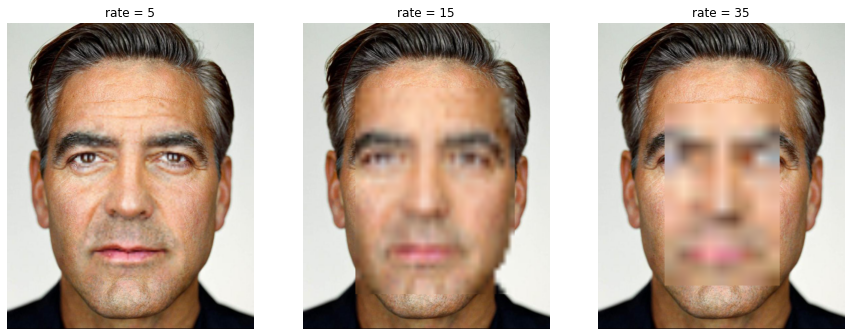

In [14]:
fig, axs = plt.subplots(1,3, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('rate = 5')
axs[1].imshow(cv2.cvtColor(img15, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('rate = 15')
axs[2].imshow(cv2.cvtColor(img35, cv2.COLOR_BGR2RGB)), axs[2].axis('off'), axs[2].set_title('rate = 35')

plt.show()